<img width="150" src="https://perso.univ-lemans.fr/~cdesjouy/_images/lmu.png" align="left">
<img width="100" src="https://perso.univ-lemans.fr/~cdesjouy/_images/gplv3.png" align="right">
<br><br><br>

---

# S01E02 : Applications

Cyril Desjouy

---

## Application 1 - Comprehensions ($\star$)


<div class="alert alert-block alert-info">

Ecrire une compréhension de liste permettant de générer un vecteur (`ndarray`) contenant les nombres de 0 à 50 divisibles par 2 et 3 : <code>[0, 6, 12, 18, 24, 30, 36, 42, 48]</code>.

</div>

In [99]:
import numpy as np

l1 = np.array([i for i in range(50) if i % 2 == 0 and i % 3 == 0])
print(l1)

[ 0  6 12 18 24 30 36 42 48]


---

## Application 2 - Manipulation des objets `ndarray` ($\star$)


<div class="alert alert-block alert-info">

* Créez un vecteur `v` (`ndarray`) contenant 100 valeurs équiréparties entre 0 et $20\pi$.

* Créez une matrice `m1` $10\times 10$ contenant les valeurs de `v`

* Créez une matrice `m2` dont chaque valeur est le cosinus de `m1` $+ \pi$.

* Créez une matrice `m3` dont chaque valeur est le sinus de `m1` $- \pi$.

* Créez une matrice `m4` dont chaque valeur est l'addition de chaque valeur de `m2` au carré et de `m3` au carré.

* Donner la valeur 0 à tous les éléments de `m4` sauf les deux premières et dernières lignes et colonnes.

* Créez une matrice `m5` étant le produit scalaire des sous matrices $4\times 4$ de `m4` en haut à gauche et en bas à droite.

* Extraire de `m5` la sous matrice étant l'intersection des 2 dernières colonnes et des deux premières lignes.

* Comparez votre résultat au résultat attendu ci-dessous.

</div>


```python

array([[4., 4.],
       [4., 4.]])


```


In [98]:
import numpy as np
import matplotlib.pyplot as plt


v = np.linspace(0, 20 * np.pi, 100)
m1 = v.reshape(10, 10)
m2 = np.sin(m1 - np.pi)
m3 = np.cos(m1 + np.pi)
m4 = m2 ** 2 + m3 ** 2 
m4[2:-2, 2:-2] = 0
m5 = m4[:4, :4] @ m4[-4:, -4:]
m5[:2, -2:]

array([[4., 4.],
       [4., 4.]])

---

## Application 3 - Figure basique ($\star$)


<div class="alert alert-block alert-info">

Reproduire la figure suivante.

</div>

---

**Note :** L'intervalle des abscisses est $[0, 2\pi]$.

---

<img width="700" src="https://perso.univ-lemans.fr/~cdesjouy/_images/TD_reminders_simple_plot.png" align="center">

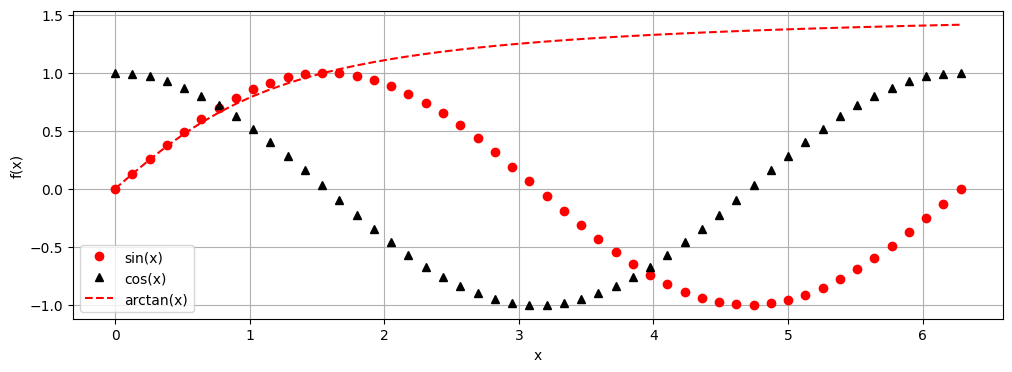

In [64]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 50)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, np.sin(x), 'ro', label='sin(x)')
ax.plot(x, np.cos(x), 'k^', label='cos(x)')
ax.plot(x, np.arctan(x), 'r--', label='arctan(x)')
ax.grid()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('TD_reminders_simple_plot.png', bbox_inches='tight')
plt.show()

---

## Application 4 - Niveau d'énergie d'une électron (ou partition ?) ($\color{red}\star$)


<div class="alert alert-block alert-info">

Reproduire la figure suivante.

</div>

---

**Note 1 :** La méthode `axvline()` héritée par les objets `Axes` permet de tracer des lignes horizontales.

**Note 2 :** Les *ticks* (valeurs sur les axes) peuvent être personnalisé avec les méthodes `set_xtick()`/`set_yticks()`. Pour enlever totalement les *ticks*, vous pouvez fournir à ces méthodes une liste vide : `ax.set_xtick([])`.

**Rappel :** Pour consulter l'aide d'une méthode de l'objet `ax` : `ax.axvline?` ou `help(ax.axvline)`.


---

<img width="700" src="https://perso.univ-lemans.fr/~cdesjouy/_images/TD_reminders_partition.png" align="center">

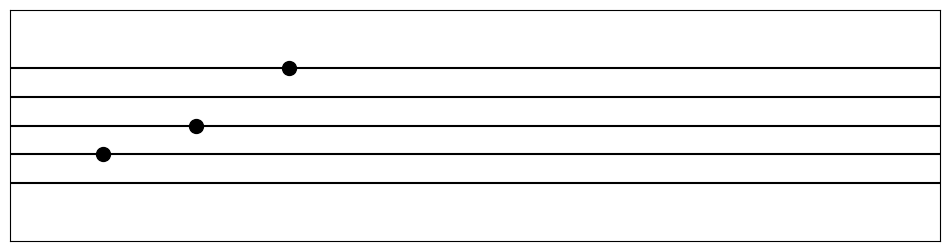

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 3))
for i in range(2, 7):
    ax.axhline(i, color='k')
ax.plot(1, 3, 'o', color='k', markersize=10)
ax.plot(2, 4, 'o', color='k', markersize=10)
ax.plot(3, 6, 'o', color='k', markersize=10)
ax.set_ylim(0, 8)
ax.set_xlim(0, 10)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('TD_reminders_partition.png')
plt.show()

---

## Application 5 - Excès de vitesse ($\color{red}\star$)


<div class="alert alert-block alert-info">

Reproduire la figure suivante.

</div>

<img width="700" src="https://perso.univ-lemans.fr/~cdesjouy/_images/TD_reminders_speed.png" align="center">

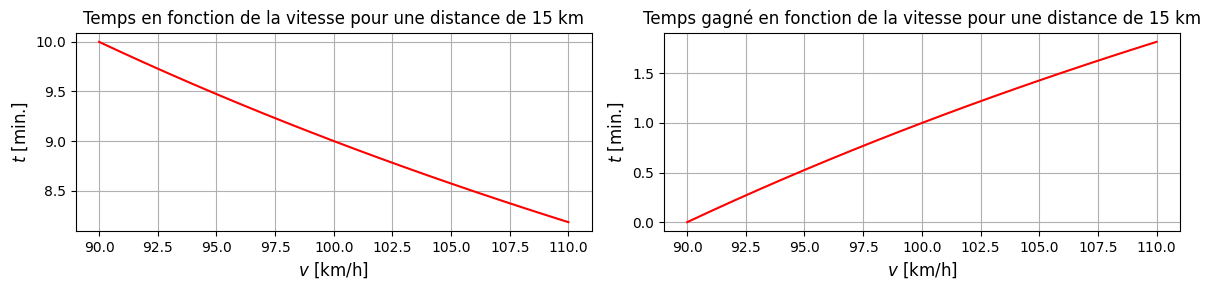

In [85]:
import numpy as np
import matplotlib.pyplot as plt

d = 15
v = np.arange(90, 111, 1)
t = d/v

fig, axes = plt.subplots(1, 2, figsize=(12, 3), tight_layout=True)

axes[0].plot(v, t * 60, 'r')
axes[0].set_title('Temps en fonction de la vitesse pour une distance de {} km'.format(d))

axes[1].plot(v, (t[0] - t) * 60, 'r')
axes[1].set_title('Temps gagné en fonction de la vitesse pour une distance de {} km'.format(d))

for ax in axes:
    ax.set_xlabel(r'$v$ [km/h]', fontsize=12)
    ax.set_ylabel(r'$t$ [min.]', fontsize=12)
    ax.grid()

fig.savefig('TD_reminders_speed.png', bbox_inches='tight')
plt.show()

---

## Application 6 - Automatisation de la création des sous figures ($\color{red}\star\star$)


<div class="alert alert-block alert-info">

On veut créer la figure présentée ci-après. 

Sur chaque sous figure est représentée une fonction $f_n(x)$ où $n$ est l'indice de la colonne sur laquelle elle se trouve. 

* 1ère colonne : $f_0(x) = \sin(i \pi x) + \dfrac{\sqrt{x}}{i + 1}$.

* 2ème colonne : $f_1(x) = \sin(i \pi x) + \dfrac{x}{i + 1}$.

* 3ème colonne : $f_2(x) = \sin(i \pi x) + \dfrac{x^2}{i + 1}$.

où $i$ est l'indice de la ligne sur laquelle est tracée la fonction. La fonction est tracé sur 1000 points sur l'intervalle $[0, 2\pi]$.

Reproduire cette figure en minimisant le nombre d'instruction (utiliser des boucles).

</div>


<img width="700" src="https://perso.univ-lemans.fr/~cdesjouy/_images/TD_reminders_subplots.png" align="center">

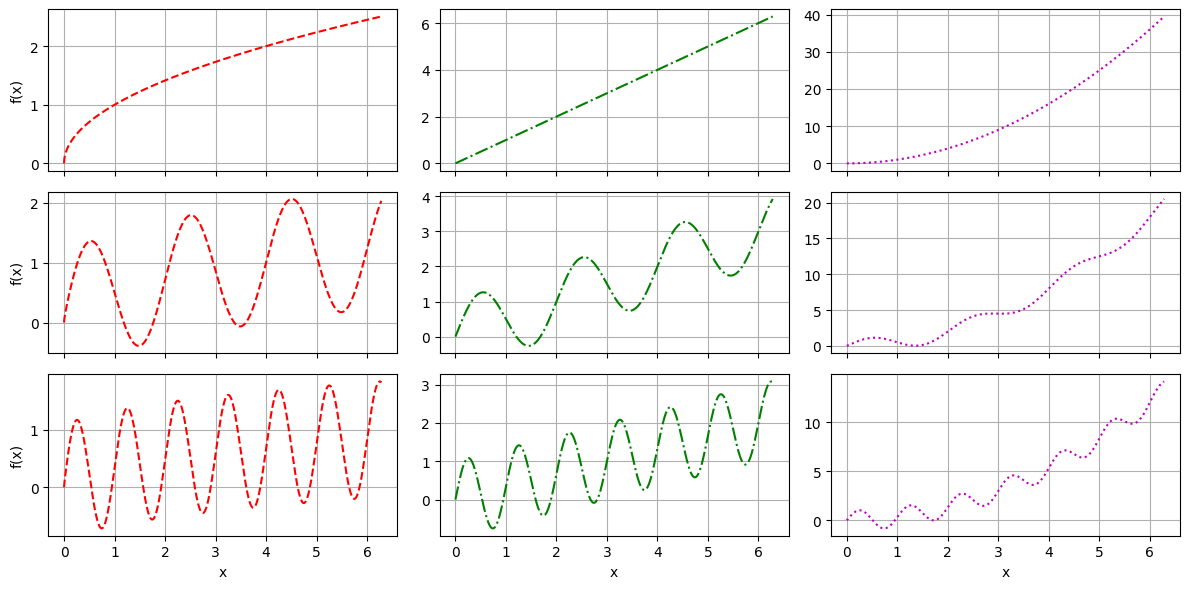

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 1000)

nrows, ncols = 3, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, tight_layout=True, figsize=(12, 6))

for i in range(nrows):
    axes[i, 0].plot(x, np.sin(i * np.pi * x) + np.sqrt(x) / (i + 1), 'r--')
    axes[i, 0].grid()

    axes[i, 1].plot(x, np.sin(i * np.pi * x) + x / (i + 1), 'g-.')
    axes[i, 1].grid()

    axes[i, 2].plot(x, np.sin(i * np.pi * x) + x ** 2 / (i + 1), 'm:')
    axes[i, 2].grid()

for ax in axes[:, 0]:
    ax.set_ylabel('f(x)')

for ax in axes[-1, :]:
    ax.set_xlabel('x')

fig.savefig('TD_reminders_subplots.png', bbox_inches='tight')
plt.show()

---

## Application 7 - Construction d'objets `ndarray` ($\color{red}\star$)


<div class="alert alert-block alert-info">

Construire une matrice $(N\times M)$ dont

* les éléments dont le reste de la division de $(i + 1)$ et $(j + 1)$ est nul valent 11,

* les éléments dont le reste de la division de $(i + 1)$ et $(j + 1)$ vaut 1 valent 8,


où $i$ et $j$ sont respectivement l'indice de la ligne et celui de la colonne.

</div>

Par exemple, pour une matrice (10, 10), le résultat suivant est attendu.

```python

[[11.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [11. 11.  0.  0.  0.  0.  0.  0.  0.  0.]
 [11.  8. 11.  0.  0.  0.  0.  0.  0.  0.]
 [11. 11.  8. 11.  0.  0.  0.  0.  0.  0.]
 [11.  8.  0.  8. 11.  0.  0.  0.  0.  0.]
 [11. 11. 11.  0.  8. 11.  0.  0.  0.  0.]
 [11.  8.  8.  0.  0.  8. 11.  0.  0.  0.]
 [11. 11.  0. 11.  0.  0.  8. 11.  0.  0.]
 [11.  8. 11.  8.  0.  0.  0.  8. 11.  0.]
 [11. 11.  8.  0. 11.  0.  0.  0.  8. 11.]]
 
```

In [ ]:
import numpy as np

nx, ny = 10, 10
m = np.zeros((nx, ny))

for i in range(nx):
    for j in range(ny):
        if (i + 1) % (j + 1) == 0:
            m[i, j] = 11
        elif (i + 1) % (j + 1) == 1:
            m[i, j] = 8
print(m)


[[11.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [11. 11.  0.  0.  0.  0.  0.  0.  0.  0.]
 [11.  8. 11.  0.  0.  0.  0.  0.  0.  0.]
 [11. 11.  8. 11.  0.  0.  0.  0.  0.  0.]
 [11.  8.  0.  8. 11.  0.  0.  0.  0.  0.]
 [11. 11. 11.  0.  8. 11.  0.  0.  0.  0.]
 [11.  8.  8.  0.  0.  8. 11.  0.  0.  0.]
 [11. 11.  0. 11.  0.  0.  8. 11.  0.  0.]
 [11.  8. 11.  8.  0.  0.  0.  8. 11.  0.]
 [11. 11.  8.  0. 11.  0.  0.  0.  8. 11.]]


---

## Application 8 - Jour de la semaine ($\color{red}\star$)


Un des algorithmes de base utilisé pour connaître le jour de la semaine correspondant à une date donnée est l'***algorithme de Mike Keith***. Cet algorithme est défini de la manière décrite ci-après.

On définit les variables suivantes :

* Le jour $d$ peut prendre des valeurs de 1 à 31

* Le mois $m$ peut prendre des valeurs de 1 à 12

* L'année $y$ peut prendre des valeurs entre 1582 et $+\infty$

On considère deux cas : 

* Le mois est compris entre janvier (1) inclus et mars (3) non inclus, alors 

$D = \left( \left[\dfrac{23m}{9}\right] + d + 4 + y + \left[\dfrac{z}{100} \right] + \left[\dfrac{z}{400} \right] \right)$ avec $z = y-1$

* Le mois est compris entre mars (3) inclus et décembre (12) inclus, alors 

$D = \left( \left[\dfrac{23m}{9}\right] + d + 4 + y + \left[\dfrac{z}{100} \right] + \left[\dfrac{z}{400} \right] - 2 \right)$ avec $z = y$

Le résultat $D$ est alors le jour de la semaine ($D \in [0, 6]$ avec 0 == Dimanche, 1 == Lundi, ... , 6 == Samedi). La notation $\left[\dfrac{a}{b}\right]$ désigne la division entière de a par b. Il s'agit de l'opérateur double slash (`//`) sous Python.


<div class="alert alert-block alert-info">

Écrivez un programme demandant une date à l'utilisateur (successivement jour, mois, puis année), puis affichant le jour de la semaine correspondant. Votre programme fonctionnera comme suit : 

</div>


```python

Jour ? 12
Mois ? 1
Année ? 1981

Le 12/1/1981 était un lundi !

```

In [74]:
days = ('dimanche', 'lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi')

d = int(input('Jour ? '))
m = int(input('Mois ? '))
y = int(input('Année ? '))

if m >= 3:
    z = y
    D = (23 * m // 9 + d + 4 + y + z // 4 - z // 100 + z // 400 - 2 ) % 7
elif m < 3:
    z = y - 1
    D = (23 * m // 9 + d + 4 + y + z // 4 - z // 100 + z // 400) % 7

print('Le {}/{}/{} était un {} !'.format(d, m, y, days[D]))

Le 12/1/1981 était un lundi !
